In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [2]:
import pandas as pd

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
feature = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]

wine_data = pd.read_csv(dataset_url, names = feature)
print ("Dataset Lenght:: ", len(wine_data))
print ("Dataset Shape:: ", wine_data.shape)
wine_data.head()

Dataset Lenght::  178
Dataset Shape::  (178, 14)


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dataset_url = '/Users/....../wine.data.txt'
feature = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]

wine_data = pd.read_csv(dataset_url, names = feature)
print ("Dataset Lenght:: ", len(wine_data))
print ("Dataset Shape:: ", wine_data.shape)
wine_data.head()

Dataset Lenght::  178
Dataset Shape::  (178, 14)


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = wine_data.drop('Cultivator',axis=1)
y = wine_data['Cultivator']

In [5]:
from sklearn import datasets
wine_data = datasets.load_wine()
type(wine_data)


sklearn.utils.Bunch

In [6]:
X = wine_data.data
y = wine_data.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

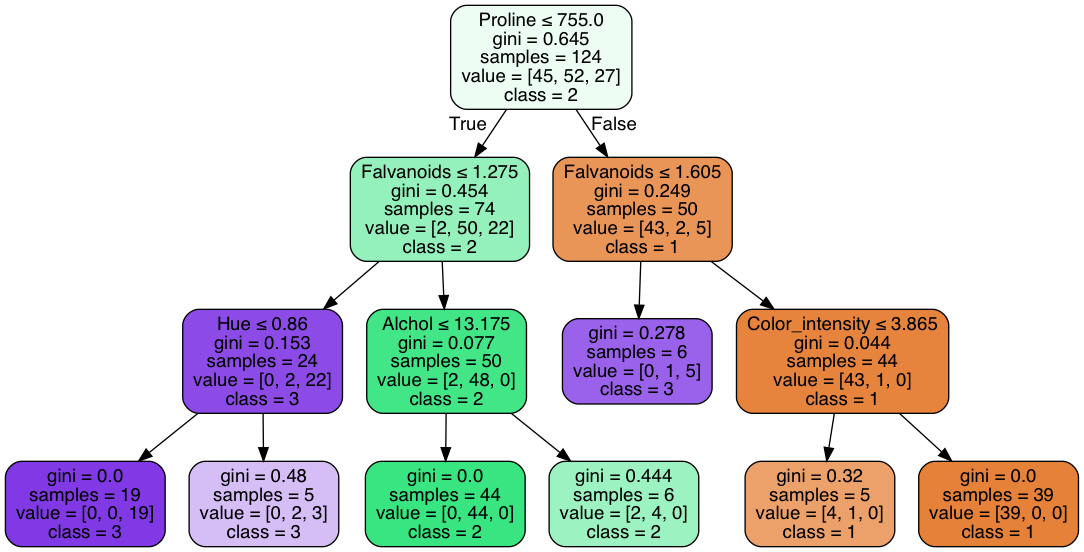

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

feature_2 = ["Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
target = ['1','2','3']

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=feature_2,  
                class_names=target,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 2])

In [10]:
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(clf_gini.score(X_train, y_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(clf_gini.score(X_test, y_test)*100))

Accuracy of Decision Tree classifier on training set: 95.1613
Accuracy of Decision Tree classifier on test set: 81.4815


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.74      0.74      0.74        19
           2       0.84      0.76      0.80        21

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.83      0.82        54
weighted avg       0.81      0.81      0.81        54

[[14  0  0]
 [ 2 14  3]
 [ 0  5 16]]
